In [20]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import time
import requests
from scipy.stats import linregress

In [21]:
# Import API key
from config import weather_api_key 

# citipy to determine city based on latitude and longitude
from citipy import citipy

# Output
output_data_file = "WeatherPy_output.csv"

# Range of Latitudes and Longitudes
lat_range = (-90, 90)
ing_range = (-180, 180)

In [22]:
 # Create lists to hold response data for lat_lngs and cities
lat_lngs = []
cities = []

while len(cities) < 500:
    
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        if city not in cities:
            cities.append(city)

# Numbers of City
len(cities)

649

In [23]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

c_id= []
name = []
country = []
long = []
latt = []
cloudiness= []
date= []
humidity= []
max_temp = []
wind_speed = []
weather_json = {}

try:
    url = "http://api.openweathermap.org/data/2.5/weather?"

    for city in cities:
        query_url = url + "&q=" + city + "&APPID=" + weather_api_key 
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        
        c_id.append(str(weather_json['id']))
        name.append(str(weather_json['name']))
        country.append(str(weather_json['sys']['country']))
        long.append(float(round(weather_json['coord']['lon'],2)))
        latt.append(float(round(weather_json['coord']['lat'],2)))
        cloudiness.append(float(weather_json['clouds']['all']))
        humidity.append(float(weather_json['main']['humidity']))
        max_temp.append((1.8*(weather_json['main']['temp_max'] - 273) + 32))
        wind_speed.append(float(weather_json['wind']['speed']))
        
except KeyError:
    
    pass

# print(query_url)


In [24]:
# Create DataFrame
weather_list_df = pd.DataFrame({'City ID':c_id,'City':name,'Country':country,'Lng':long,'Lat':latt, 'Cloudiness':cloudiness,  'Humidity': humidity, 'Max Temp':max_temp, 'Wind Speed':wind_speed})
weather_list_df.to_csv(output_data_file,index = False)
weather_list_df.head()

,City ID,City,Country,Lng,Lat,Cloudiness,Humidity,Max Temp,Wind Speed
0,3420846,Qaqortoq,GL,-46.03,60.72,90.0,29.0,44.870,16.46
1,6185377,Yellowknife,CA,-114.35,62.46,20.0,76.0,-13.738,1.54
2,2138522,Poya,NC,165.15,-21.35,21.0,63.0,84.866,2.03
3,8079926,Labuhan,ID,112.21,-6.88,100.0,80.0,81.734,4.34
4,1000543,Graaff-Reinet,ZA,24.53,-32.25,100.0,86.0,70.268,1.22


FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Lat_MT.png'

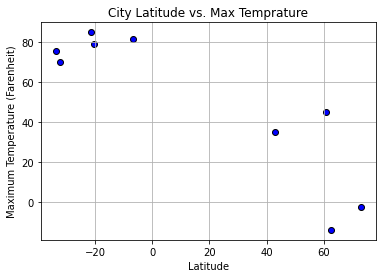

In [29]:
# Latitude vs. Temperature Plot
plt.scatter(weather_list_df['Lat'], weather_list_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
# plt.ylim(0,120)

# Set the upper and lower limits of our x axis
# plt.xlim(-60,180)

# Create a title, x label, and y label for our chart
plt.title("City Latitude vs. Max Temprature")
plt.ylabel("Maximum Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig('output_data/Lat_MT.png')